In [2]:
import pandas as pd
import os
import numpy as np

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns
import seaborn.objects as so
sns.set(style="whitegrid") # can set style depending on how you'd like it to look

import folium  #needed for interactive map
from folium.plugins import HeatMap

import branca

import geopandas
from shapely.geometry import Polygon
from shapely.geometry import Point
from geopandas import GeoDataFrame

plotsize = (15,6)

In [3]:
data_g33 = pd.read_excel(io = "./MTFF Graphs English.xlsx", sheet_name = "G 3.3.", skiprows = 23, usecols = "B:O", header = 0)
data_g33.rename({"Unnamed: 1": "KPI",
                2023 : '2023',
                2024 : '2024',
                2025 : '2025',
                2026 : '2026',
                2027 : '2027',
                2028 : '2028',
                2029 : '2029',
                2030 : '2030',
                2031 : '2031',
                2032 : '2032',
                2033 : '2033',
                2034 : '2034',
                2035 : '2035'}, axis = 1, inplace = True)
data_g33.head()

,KPI,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
0,Traditional exports (mining-energy),7.9,6.4,6.4,6.2,6.1,6.0,5.8,5.6,5.5,5.2,5.0,4.7,4.6
1,Traditional exports (other),1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.7,1.7,1.7,1.7,1.7
2,Non-traditional exports,4.1,3.5,3.7,3.8,3.9,4.0,4.2,4.3,4.4,4.5,4.7,4.8,5.0
3,Imports,-16.3,-14.0,-14.2,-14.2,-14.2,-14.3,-14.3,-14.3,-14.3,-14.4,-14.4,-14.3,-14.3
4,Balance of services,-0.3,-0.5,-0.5,-0.6,-0.6,-0.7,-0.7,-0.7,-0.7,-0.7,-0.6,-0.6,-0.6


In [4]:
data_g33_graph = pd.melt(data_g33, id_vars = ["KPI"], value_vars = ['2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035'], var_name = "Year")
data_g33_graph.rename({'value': '% GDP'}, inplace = True, axis = 1)
data_g33_graph

,KPI,Year,% GDP
0,Traditional exports (mining-energy),2023,7.9
1,Traditional exports (other),2023,1.6
2,Non-traditional exports,2023,4.1
3,Imports,2023,-16.3
4,Balance of services,2023,-0.3
...,...,...,...
99,Imports,2035,-14.3
100,Balance of services,2035,-0.6
101,Factorial rent,2035,-2.6
102,Transfers,2035,3.3


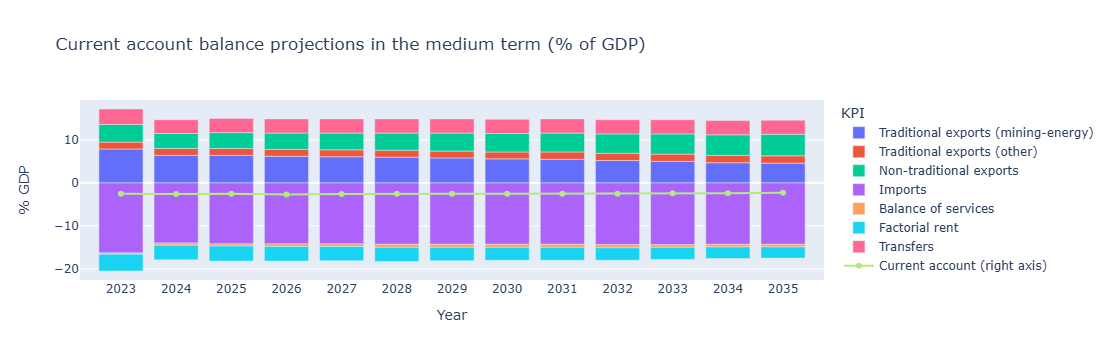

In [6]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

fig = px.bar(data_g33_graph[data_g33_graph.KPI != "Current account (right axis)"], x="Year", y="% GDP", color="KPI", title="Current account balance projections in the medium term (% of GDP)")
fig.add_trace(go.Scatter(x=data_g33_graph[data_g33_graph.KPI == "Current account (right axis)"]['Year'], 
                         y=data_g33_graph[data_g33_graph.KPI == "Current account (right axis)"]['% GDP'], 
                         name="Current account (right axis)",
                        text=data_g33_graph[data_g33_graph.KPI == "Current account (right axis)"]['% GDP']))


fig.show()
fig.write_html('./G33.html')

Text(0.5, 1.0, 'Current account balance projections in the medium term (% of GDP)')

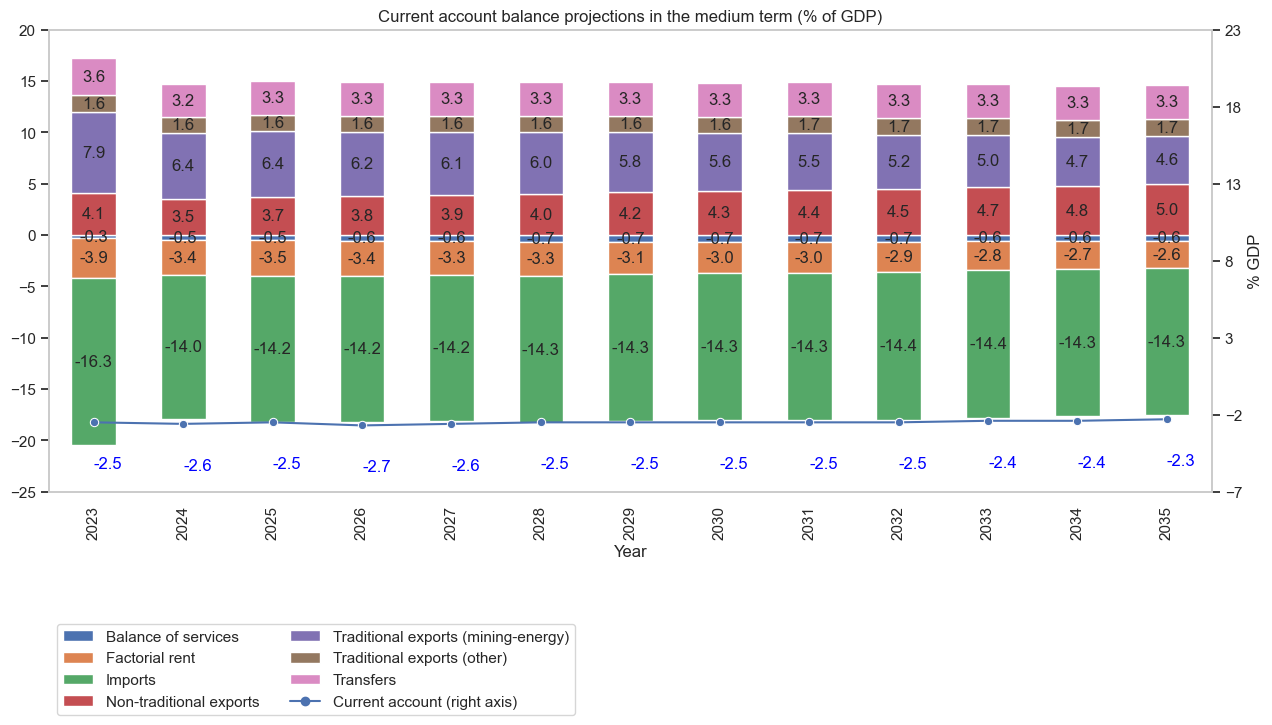

In [8]:
df = data_g33_graph[data_g33_graph.KPI != "Current account (right axis)"].pivot(index='Year', columns='KPI', values='% GDP')

fig, ax = plt.subplots(figsize = plotsize)

# Barplot 
df.plot(kind='bar', stacked=True, ax=ax)

# Create 2nd axis
ax2 = plt.twinx()

# DF for line plot
df_linea = data_g33_graph[data_g33_graph.KPI == "Current account (right axis)"].copy()

# Lineplot
sns.lineplot(x="Year",  y="% GDP", data=df_linea, color="b", ax=ax2, marker='o')
legend_line_plot = mlines.Line2D([], [], color="b", label="Current account (right axis)", marker='o')

# label points on the plot
for x, y in zip(df_linea['Year'], df_linea['% GDP']):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y-3, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = np.round(y, 1), # data label, formatted to ignore decimals
     color = 'blue') # set colour of line


handles, labels = ax.get_legend_handles_labels()
handles.extend([legend_line_plot])

ax.legend(handles=handles, loc='lower left', bbox_to_anchor=(0, -0.5), ncols = 2)

ax.set_yticks(np.arange(-25, 25,5))
ax2.set_yticks(np.arange(-7, 25 ,5))

for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [np.round(v.get_height(), 1) for v in c]# [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')


ax.grid(False)
ax2.grid(False)
plt.title("Current account balance projections in the medium term (% of GDP)")